# Part2 - RADAR Data Visualization and Analysis

In [124]:
%matplotlib inline

import numpy as np
import scipy as spy
import random as rdm
import matplotlib.pyplot as plt
import math as mth
import spectrum as sp
import os

## Overview of RADAR data
<p style='text-align: justify;'> Please follow this [link](https://drive.google.com/drive/folders/1vJF8ljsGMV4Nrny7E5y_mmwjWq5oopeH?usp=sharing) to find and download RADAR data that I am going to use in this notebook. This data was originally shared in this [github repositorty](https://github.com/povilasDadelo/Material-classification.git).</p>

<p style='text-align: justify;'> This data can used for 2 different applications: 
   1. Object recognition 
   2. Material classification   
    
- In this notebook, I will be only visualizing, transforming and analysing signal from different subforlders.

- The data folder contains subfolders for  different objects(Materials). Once you run the below section, you will be requested to prodvide material that you want to visualize its data.</p>


In [125]:
data_path = "/home/issa/Documents/data"
os.chdir(data_path)
material = input("Enter material: ")
material = material.lower()

In [126]:
os.chdir(material)
items_list = os.listdir()
nbr_items = len(items_list)


In [127]:
material_sig_idx = rdm.randint(1,nbr_items) ;
material_sig = np.load(items_list[material_sig_idx])

## Visualization in time domain

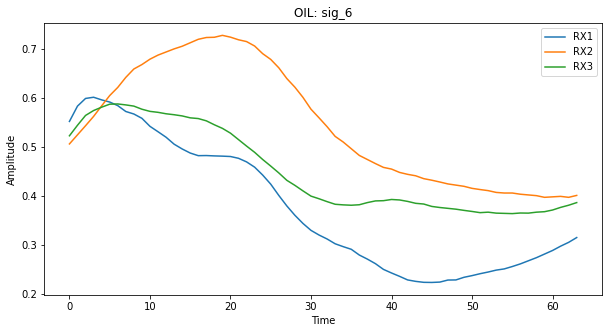

In [128]:
# Randomly select and plot signal for to selected object
plt.figure(figsize = (10,5))
plt.plot(np.transpose(material_sig))
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title(material.upper() + ': sig_' + str(material_sig_idx))
plt.legend(["RX1", "RX2", "RX3"])
plt.show()

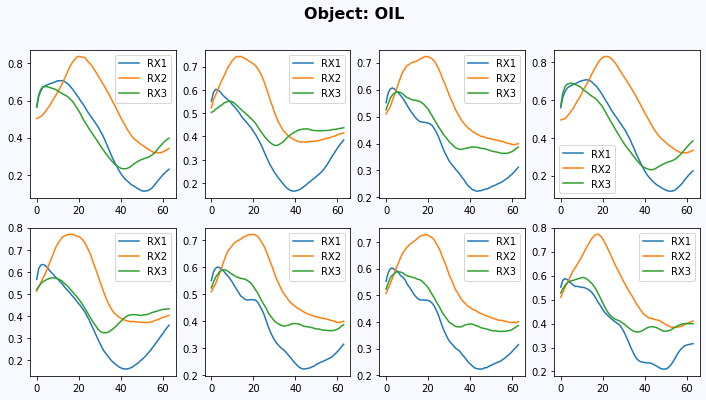

In [129]:
# Plot all the signals in the selected folder 
fig, axs = plt.subplots(2, 4, facecolor = 'ghostwhite')
fig.set_figheight(6)
fig.set_figwidth(12)
axs = axs.ravel()

for ii in range(nbr_items):
    obj_signal = np.load(items_list[ii])
    axs[ii].plot(np.transpose(obj_signal))
    axs[ii].legend(["RX1", "RX2", "RX3"])
plt.suptitle("Object: " + material.upper(), fontsize = 16, fontweight = 'bold')
plt.show()

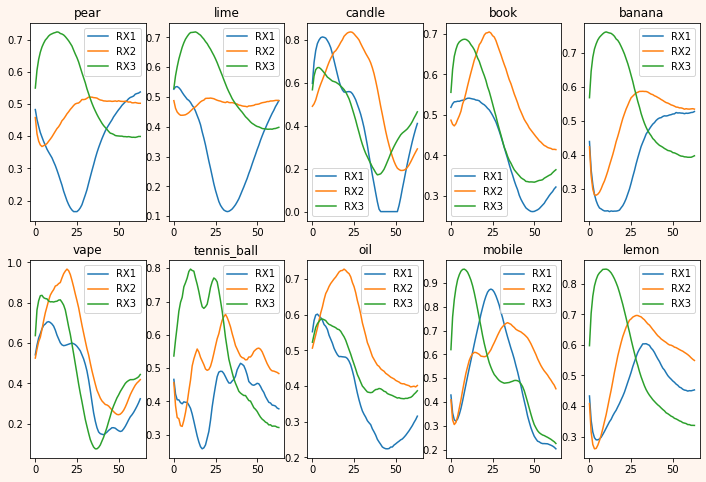

In [130]:
# Change directory to data directoryand list of subfolders names
folders = os.listdir(os.chdir('/home/issa/Documents/data'))
len_fold = len(folders)

# Randomly from each folder get a signal and plot it
fig, axs = plt.subplots(2, round(len_fold/2), facecolor = 'seashell')
fig.set_figheight(8)
fig.set_figwidth(12)
axs = axs.ravel()

for  fold_idx, folder in enumerate(folders):
    selected_sig  = np.load(folder + '/' + rdm.choice(os.listdir(os.getcwd()+ '/' + folder)))
    axs[fold_idx].plot(np.transpose(selected_sig))
    axs[fold_idx].set_title(folder)
    axs[fold_idx].legend(["RX1", "RX2", "RX3"])
    
plt.show()

## Spectral Analysis- based Fourier Transform

In [131]:
#  Change directory to the selected material's directory
os.chdir(material)
material_sigs = os.listdir()

> Basic Fourier Analysis

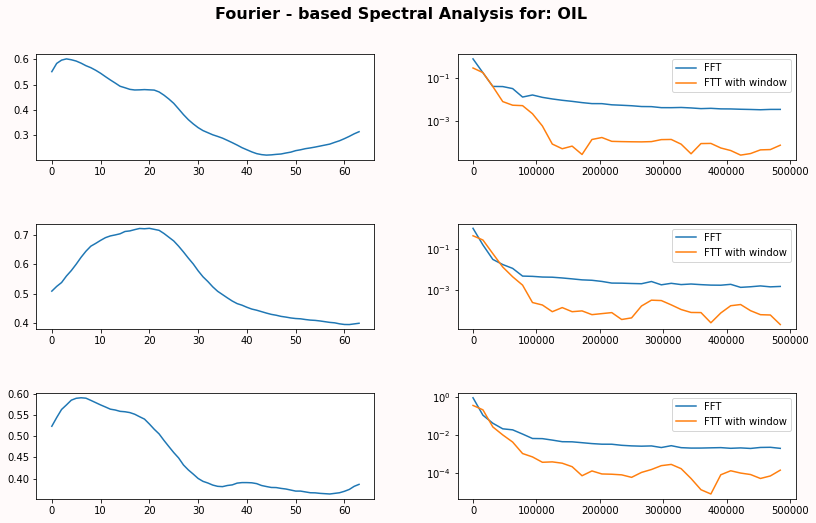

In [132]:
fig, axs = plt.subplots(nrows=3, ncols=2, facecolor = "snow")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.set_figheight(8)
fig.set_figwidth(12)
axs = axs.ravel()

N = 64
wn_fft = spy.signal.blackman(N)
Fs= 1000000 # 1 GHz
T = 1/Fs

sig_rxs = np.transpose(np.load(rdm.choice(material_sigs)))
# rxs_fft = abs(spy.fft.fft(sig_rxs))
f_hz = spy.fft.fftfreq(N, T)[:N//2]
rxs = ["RX1", "RX2", "RX3"]

for rxIdx, rx in enumerate(rxs):
   axs[2*rxIdx].plot(sig_rxs[:,rxIdx])
   
   # FFT with no windowing
   rx_fft = spy.fft.fft(sig_rxs[:,rxIdx])
   axs[2*rxIdx+1].plot(f_hz, 2.0/N * np.abs(rx_fft[0:N//2]))
   
   # FFT with windowing
   rx_fft = spy.fft.fft(sig_rxs[:,rxIdx]*wn_fft)
   axs[2*rxIdx+1].plot(f_hz, 2.0/N * np.abs(rx_fft[0:N//2]))
   
   axs[2*rxIdx+1].set_yscale("log")
   axs[2*rxIdx+1].legend(["FFT", "FTT with window"])
   
plt.suptitle("Fourier - based Spectral Analysis for: " + material.upper(), fontsize = 16, fontweight = 'bold')    
plt.show()

> PSD estimation using periodogram

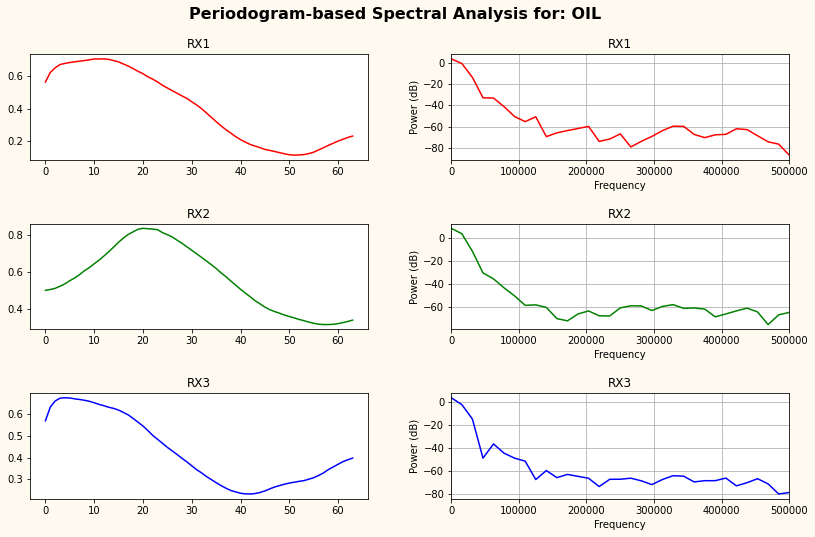

In [133]:
fig, axs = plt.subplots(nrows=3, ncols=2, facecolor = 'floralwhite')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.set_figheight(8)
fig.set_figwidth(12)
axs = axs.ravel()
rxs = ["RX1", "RX2", "RX3"]
clr = ["red", "green", "blue"]
sig_rxs = np.transpose(np.load(rdm.choice(material_sigs)))
for rxIdx, rx in enumerate(rxs):
   axs[2*rxIdx].plot(sig_rxs[:,rxIdx], color = clr[rxIdx])
   axs[2*rxIdx].set_title(rxs[rxIdx])
   
   rx_prdg = sp.Periodogram(sig_rxs[:,rxIdx], sampling=Fs)
   rx_prdg.plot(ax=axs[2*rxIdx + 1], color = clr[rxIdx])
   axs[2*rxIdx +1].set_title(rxs[rxIdx])

plt.suptitle("Periodogram-based Spectral Analysis for: " + material.upper(), fontsize = 16, fontweight = 'bold')    
plt.show()

# PSD Estimation - based Parametric Methods

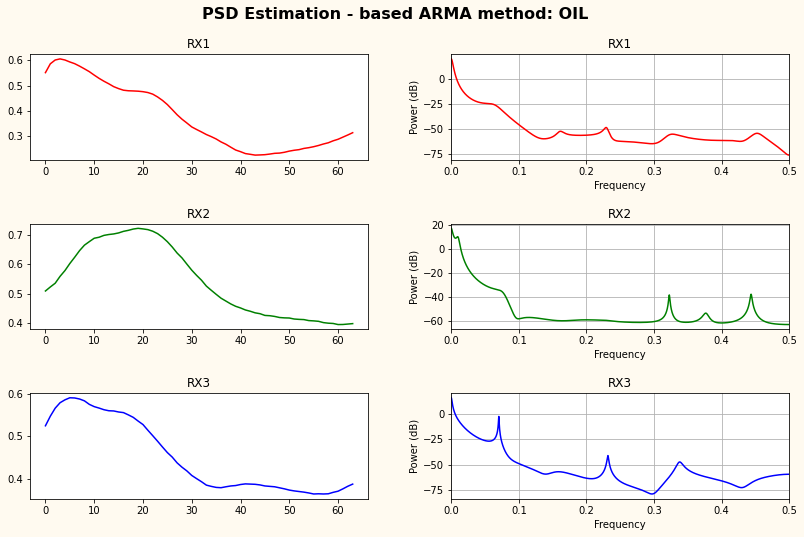

In [134]:
fig, axs = plt.subplots(nrows=3, ncols=2, facecolor = 'floralwhite')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.set_figheight(8)
fig.set_figwidth(12)
axs = axs.ravel()
rxs = ["RX1", "RX2", "RX3"]
clr = ["red", "green", "blue"]
sig_rxs = np.transpose(np.load(rdm.choice(material_sigs)))
for rxIdx, rx in enumerate(rxs):
   axs[2*rxIdx].plot(sig_rxs[:,rxIdx], color = clr[rxIdx])
   axs[2*rxIdx].set_title(rxs[rxIdx])
   
   rx_pma = sp.parma(sig_rxs[:,rxIdx], 15, 15, 30, NFFT=4096)  # ARMA: AutoregRessive and Moving Average             
   rx_pma.plot(ax=axs[2*rxIdx + 1], color = clr[rxIdx])
   axs[2*rxIdx +1].set_title(rxs[rxIdx])

plt.suptitle("PSD Estimation - based ARMA method: " + material.upper(), fontsize = 16, fontweight = 'bold')    
plt.show()

# Time - Frequency analysis using Spectrogram 
Spectrograms can be used as a way of visualizing the change of a nonstationary signal’s frequency content over time.

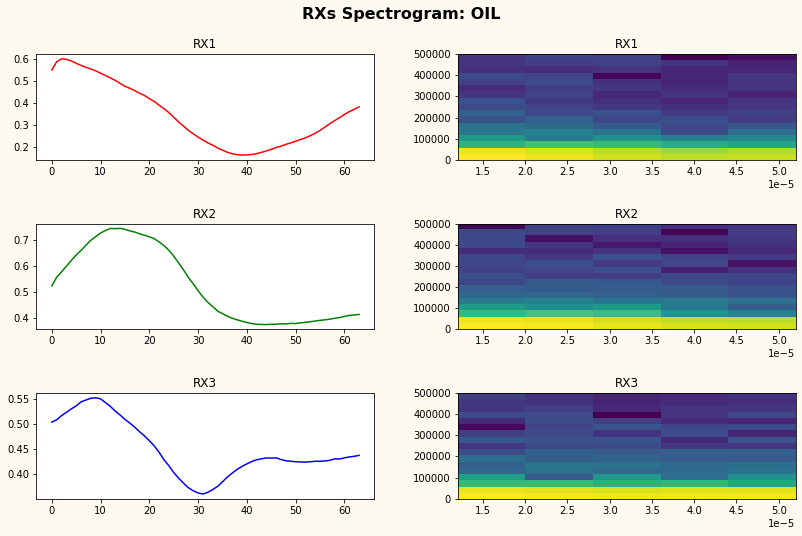

In [135]:
fig, axs = plt.subplots(nrows=3, ncols=2, facecolor = 'floralwhite')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.set_figheight(8)
fig.set_figwidth(12)
axs = axs.ravel()
rxs = ["RX1", "RX2", "RX3"]
clr = ["red", "green", "blue"]
sig_rxs = np.transpose(np.load(rdm.choice(material_sigs)))
for rxIdx, rx in enumerate(rxs):
    axs[2*rxIdx].plot(sig_rxs[:,rxIdx], color = clr[rxIdx])
    axs[2*rxIdx].set_title(rxs[rxIdx])
    axs[2*rxIdx].set_title(rxs[rxIdx])
       
    axs[2*rxIdx +1].specgram(sig_rxs[:,rxIdx], NFFT= 32, Fs=Fs, noverlap= 24)
    
    axs[2*rxIdx +1].set_title(rxs[rxIdx])
    
plt.suptitle("RXs Spectrogram: " + material.upper(), fontsize = 16, fontweight = 'bold')    
plt.show()